 
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;"> British Airlines Review Sentiment Analysis </h1>

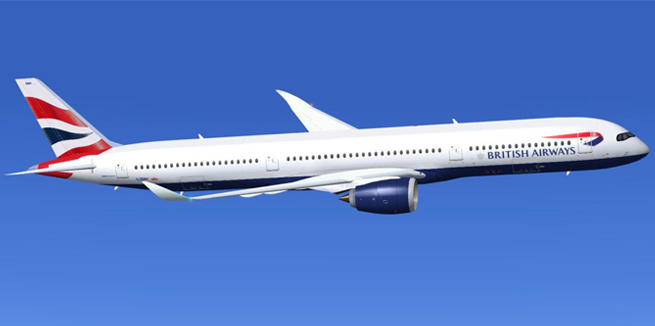

 
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px 10px;"> Importing Libraries </h1>

In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
# <h1 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px 10px;"> EDA </h1>
import seaborn as sns
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [82]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [83]:
df= pd.read_csv(r"BA_Cust_Reviews.csv")



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px 10px;"> EDA </h1>

In [84]:
df.head()

,Unnamed: 0,Review Header,Review Date,Review,Class Type,Sentiment
0,0,"""crew were really nice""",16th February 2023,✅ Trip Verified | This was my first time flyin...,Economy Class,Positive
1,1,"""Lots of cancellations and delays""",15th February 2023,✅ Trip Verified | Lots of cancellations and d...,Economy Class,Negative
2,2,"""Overall, very happy with BA""",7th February 2023,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,Economy Class,Positive
3,3,"""the best airline I've flown with""",6th February 2023,✅ Trip Verified | Not only my first flight in...,Economy Class,Positive
4,4,"""so determined to help""",4th February 2023,✅ Trip Verified | My husband and myself were ...,Economy Class,Positive


In [85]:
dataset = df[["Review","Sentiment"]]
dataset.head()

,Review,Sentiment
0,✅ Trip Verified | This was my first time flyin...,Positive
1,✅ Trip Verified | Lots of cancellations and d...,Negative
2,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,Positive
3,✅ Trip Verified | Not only my first flight in...,Positive
4,✅ Trip Verified | My husband and myself were ...,Positive


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     3473 non-null   object
 1   Sentiment  3473 non-null   object
dtypes: object(2)
memory usage: 54.4+ KB


In [87]:
dataset.isnull().sum()

Review       0
Sentiment    0
dtype: int64

 
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px 10px;"> Visualization </h1>

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

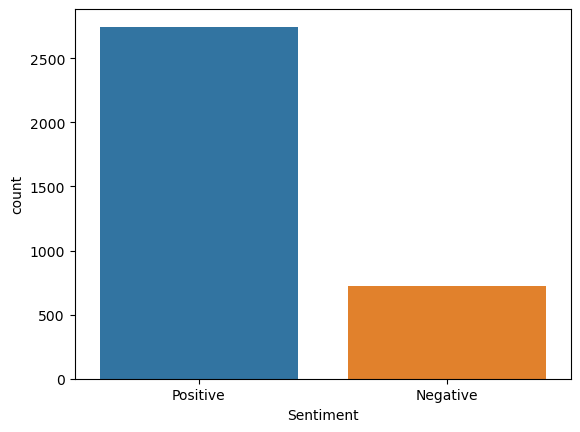

In [88]:
sns.countplot(x = 'Sentiment',data = dataset)

 
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px 10px;"> Data Preprocessing </h1>

In [89]:
dataset.loc[:, 'Review'] = dataset['Review'].str.replace(r'[^a-zA-Z\s]+', '', regex=True)

In [90]:
print(dataset['Review'].iloc[0])

 Trip Verified  This was my first time flying with BA  I was pleasantly surprised Islamabad via Doha was very comfortable and the crew were great friendly and helpful The second flight was operated by Qatar Airways this was from Doha to Islamabad My return journey was a direct BA flight kg luggage allowance was really generous and stopped the hassle with connecting flights Crew on this flight were really nice too What let BA down was the food it really was not nice the IFE could do with some more content but thats not really a huge issue


In [91]:
# Defining stopwords

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [92]:
# Removing stop words using nltk lib

#Tokenization of text
tokenizer=ToktokTokenizer() 

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

NLTK stop word lists 

{'or', 'y', 'haven', 'has', 'my', 'couldn', "aren't", "hadn't", 'what', 'all', 'where', 'above', "you've", 've', 'into', 'more', 'its', "haven't", 'up', 'do', 'just', 'so', 'both', 're', 'isn', "shouldn't", 'll', 'whom', 'our', 'does', 'having', 'he', 'further', "wasn't", 'her', 'ma', 'when', 'shouldn', 'it', 'doing', 'not', "didn't", 'very', 'before', 'mustn', 'why', 'from', 'him', 'nor', 'ain', 'there', 'to', "she's", 'weren', "that'll", "won't", "doesn't", 'myself', "wouldn't", "isn't", 'theirs', 'she', 'is', "you'll", 'be', "it's", 'itself', 'needn', 'no', 'didn', 'under', 'their', 'd', 'yours', "don't", 'can', 'you', 'yourself', 'how', 'hers', 'again', 'these', 'of', 'same', 'too', 't', 'once', 'should', 'few', 'shan', 'out', 'hasn', 'but', 'your', 'don', 'did', 'ours', 'then', 'such', 'ourselves', 'we', 'o', 'me', 'by', 'between', 'against', "shan't", 'on', 'with', 's', 'am', "weren't", 'aren', 'until', 'those', 'the', 'herself', 'won', 'off', 'had', 'if', 

In [93]:
# remove short words

dataset['Review'] = dataset['Review'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
print(dataset['Review'].iloc[0])

Trip Verified This first time flying with pleasantly surprised Islamabad Doha very comfortable crew were great friendly helpful second flight operated Qatar Airways this from Doha Islamabad return journey direct flight luggage allowance really generous stopped hassle with connecting flights Crew this flight were really nice What down food really nice could with some more content thats really huge issue


In [94]:
# Tokenizing the text

tokenizer = RegexpTokenizer(r'\w+')
dataset['Review'] = dataset['Review'].apply(tokenizer.tokenize)
dataset['Review'].head()

0    [Trip, Verified, This, first, time, flying, wi...
1    [Trip, Verified, Lots, cancellations, delays, ...
2    [Trip, Verified, Boarding, delayed, late, arri...
3    [Trip, Verified, only, first, flight, years, a...
4    [Trip, Verified, husband, myself, were, flying...
Name: Review, dtype: object

In [95]:
# Applying Stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['Review']= dataset['Review'].apply(lambda x: stemming_on_text(x))
print(dataset['Review'].iloc[0])

['Trip', 'Verified', 'This', 'first', 'time', 'flying', 'with', 'pleasantly', 'surprised', 'Islamabad', 'Doha', 'very', 'comfortable', 'crew', 'were', 'great', 'friendly', 'helpful', 'second', 'flight', 'operated', 'Qatar', 'Airways', 'this', 'from', 'Doha', 'Islamabad', 'return', 'journey', 'direct', 'flight', 'luggage', 'allowance', 'really', 'generous', 'stopped', 'hassle', 'with', 'connecting', 'flights', 'Crew', 'this', 'flight', 'were', 'really', 'nice', 'What', 'down', 'food', 'really', 'nice', 'could', 'with', 'some', 'more', 'content', 'thats', 'really', 'huge', 'issue']


In [96]:
# Applying Lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' ' .join(text)
dataset['Review'] = dataset['Review'].apply(lambda x: lemmatizer_on_text(x))
dataset.head()

,Review,Sentiment
0,Trip Verified This first time flying with plea...,Positive
1,Trip Verified Lots cancellation delay apologiz...,Negative
2,Trip Verified Boarding delayed late arrival fr...,Positive
3,Trip Verified only first flight year also firs...,Positive
4,Trip Verified husband myself were flying Madri...,Positive


In [97]:
# Applying Label Encoder
# positive 1 & negative 0
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['Sentiment'] = le.fit_transform(dataset.Sentiment.values)
dataset['Sentiment'].head()

0    1
1    0
2    1
3    1
4    1
Name: Sentiment, dtype: int32

In [98]:
# Input Feature and Label
X = dataset['Review']
y = dataset.Sentiment 

 
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px 10px;"> Model Building </h1>

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=34,
                                                    stratify=y)

In [100]:
# TFIDF : Extracting Tf-idf features

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=800, stop_words='english')

tfidf.fit(list(X_train) + list(X_test))
X_train_tfidf = tfidf.transform(X_train)
X_val_tfidf = tfidf.transform(X_test)

 <div class="alert alert-info">Random Forest</div>


In [101]:
# N estimators is the trees
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=532,random_state=34 )

In [102]:
rdf.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=532, random_state=34)

In [103]:
# Predict the target values on the training and testing data
y_train_pred = rdf.predict(X_train_tfidf)
y_test_pred = rdf.predict(X_val_tfidf)

In [104]:
# Display the accuracy scores
# Calculate the accuracy scores on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val1 = (accuracy_score(y_test, y_test_pred)*100)
print("Train Accuracy: {:.3f}".format(train_accuracy))
print("Test Accuracy: {:.3f}".format(test_accuracy))

Train Accuracy: 1.000
Test Accuracy: 0.865


In [107]:
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, y_test_pred))
print("*Classification Report for SVM: ")
print(classification_report(y_test, y_test_pred))

cm =(confusion_matrix(y_test, y_test_pred))
cm
rf_result = accuracy_score(y_test, y_test_pred)
print("Accuracy :",rf_result)
# recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
# print(recall_rf)
# precision_rf = cm[0][0]/(cm[0][0]+cm[1][0])
# print(cm[1][0])
# print(precision_rf)

rf_result = accuracy_score(y_test, y_test_pred)
print(rf_result)
precision_rf = precision_score(y_test, y_test_pred)
print(precision_rf)
recall_rf = recall_score(y_test, y_test_pred)
print(recall_rf)

*Confusion Matrix for SVM: 
[[ 99 119]
 [ 22 802]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.82      0.45      0.58       218
           1       0.87      0.97      0.92       824

    accuracy                           0.86      1042
   macro avg       0.84      0.71      0.75      1042
weighted avg       0.86      0.86      0.85      1042

Accuracy : 0.8646833013435701
0.8646833013435701
0.8707926167209555
0.9733009708737864


In [106]:

# accuracy = accuracy_score(y_test, y_test_pred)
# print(accuracy)
# precision = precision_score(y_test, y_test_pred)
# print(precision)
# recall = recall_score(y_test, y_test_pred)
# print(recall)

0.8646833013435701
0.8707926167209555
0.9733009708737864


In [108]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_test_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f1score: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.81818182 0.87079262]
recall: [0.45412844 0.97330097]
f1score: [0.5840708  0.91919771]
support: [218 824]


In [109]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate the sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9733009708737864
Specificity: 0.4541284403669725


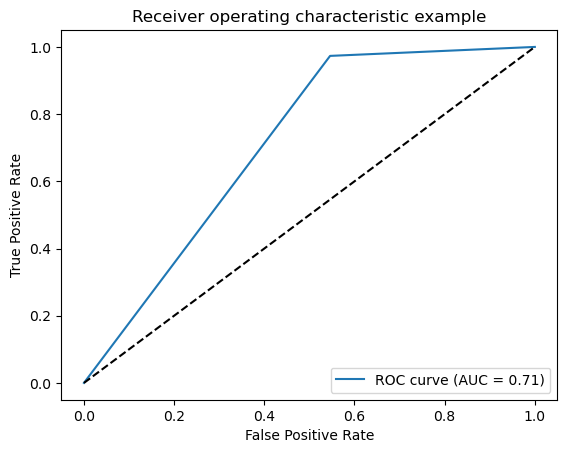

In [110]:
from sklearn.metrics import auc,roc_curve
# calculate the fpr, tpr, and thresholds for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# plot the AUC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


 <div class="alert alert-info">Naive Bayes</div>


In [111]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [112]:
# Predict the target values on the training and testing data
y_train_pred = nb.predict(X_train_tfidf)
y_test_pred = nb.predict(X_val_tfidf)

In [113]:
# Display the accuracy scores
# Calculate the accuracy scores on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val2 = (accuracy_score(y_test, y_test_pred)*100)

print("Train Accuracy: {:.3f}".format(train_accuracy))
print("Test Accuracy: {:.3f}".format(test_accuracy))

Train Accuracy: 0.852
Test Accuracy: 0.847


In [115]:

print("*Confusion Matrix for Naive Bayes: ")
print(confusion_matrix(y_test, y_test_pred))
print("*Classification Report for Naive Bayes: ")
print(classification_report(y_test, y_test_pred))# print the confusion matrix

cm =(confusion_matrix(y_test, y_test_pred))
cm
nb_result = accuracy_score(y_test, y_test_pred)
print("Accuracy :",nb_result)
# recall_nb = cm[0][0]/(cm[0][0] + cm[0][1])
# print(recall_nb)
# precision_nb = cm[0][0]/(cm[0][0]+cm[1][0])
# print(precision_nb)

nb_result = accuracy_score(y_test, y_test_pred)
print(nb_result)
precision_nb = precision_score(y_test, y_test_pred)
print(precision_nb)
recall_nb = recall_score(y_test, y_test_pred)
print(recall_nb)

*Confusion Matrix for Naive Bayes: 
[[105 113]
 [ 46 778]]
*Classification Report for Naive Bayes: 
              precision    recall  f1-score   support

           0       0.70      0.48      0.57       218
           1       0.87      0.94      0.91       824

    accuracy                           0.85      1042
   macro avg       0.78      0.71      0.74      1042
weighted avg       0.84      0.85      0.84      1042

Accuracy : 0.8474088291746641
0.8474088291746641
0.8731762065095399
0.9441747572815534


In [116]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_test_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f1score: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.69536424 0.87317621]
recall: [0.48165138 0.94417476]
f1score: [0.56910569 0.90728863]
support: [218 824]


 <div class="alert alert-info">KNeighborsClassifier</div>


In [117]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_tfidf, y_train)
# predictions = KNN.predict(X_test)

KNeighborsClassifier()

In [118]:
# Predict the target values on the training and testing data
y_train_pred = KNN.predict(X_train_tfidf)
y_test_pred = KNN.predict(X_val_tfidf)

In [119]:
# Display the accuracy scores
# Calculate the accuracy scores on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val3 = (accuracy_score(y_test, y_test_pred)*100)

print("Train Accuracy: {:.3f}".format(train_accuracy))
print("Test Accuracy: {:.3f}".format(test_accuracy))

Train Accuracy: 0.868
Test Accuracy: 0.821


In [120]:

print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, y_test_pred))
print("*Classification Report for KNN: ")
print(classification_report(y_test, y_test_pred))# print the confusion matrix

cm =(confusion_matrix(y_test, y_test_pred))
cm
knn_result = accuracy_score(y_test, y_test_pred)
print("Accuracy :",knn_result)
knn_result = accuracy_score(y_test, y_test_pred)
print(knn_result)
precision_knn = precision_score(y_test, y_test_pred)
print(precision_knn)
recall_knn = recall_score(y_test, y_test_pred)
print(recall_knn)

*Confusion Matrix for KNN: 
[[ 99 119]
 [ 67 757]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.60      0.45      0.52       218
           1       0.86      0.92      0.89       824

    accuracy                           0.82      1042
   macro avg       0.73      0.69      0.70      1042
weighted avg       0.81      0.82      0.81      1042

Accuracy : 0.8214971209213052
0.8214971209213052
0.8641552511415526
0.9186893203883495


In [121]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_test_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f1score: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.59638554 0.86415525]
recall: [0.45412844 0.91868932]
f1score: [0.515625   0.89058824]
support: [218 824]


 <div class="alert alert-info">ANN</div>


In [122]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(X_train_tfidf, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [123]:
# Predict the target values on the training and testing data
y_train_pred = ANN.predict(X_train_tfidf)
y_test_pred = ANN.predict(X_val_tfidf)

In [124]:
# Display the accuracy scores
# Calculate the accuracy scores on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val4 = (accuracy_score(y_test, y_test_pred)*100)

print("Train Accuracy: {:.3f}".format(train_accuracy))
print("Test Accuracy: {:.3f}".format(test_accuracy))

Train Accuracy: 0.970
Test Accuracy: 0.818


In [127]:

print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y_test, y_test_pred))
print("*Classification Report for ANN: ")
print(classification_report(y_test, y_test_pred))# print the confusion matrix

cm =(confusion_matrix(y_test, y_test_pred))
cm
ann_result = accuracy_score(y_test, y_test_pred)
print("Accuracy :",ann_result)
ann_result = accuracy_score(y_test, y_test_pred)
print(ann_result)
precision_ann = precision_score(y_test, y_test_pred)
print(precision_ann)
recall_ann = recall_score(y_test, y_test_pred)
print(recall_ann)

*Confusion Matrix for ANN: 
[[127  91]
 [ 99 725]]
*Classification Report for ANN: 
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       218
           1       0.89      0.88      0.88       824

    accuracy                           0.82      1042
   macro avg       0.73      0.73      0.73      1042
weighted avg       0.82      0.82      0.82      1042

Accuracy : 0.817658349328215
0.817658349328215
0.8884803921568627
0.8798543689320388


In [128]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_test_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f1score: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.5619469  0.88848039]
recall: [0.58256881 0.87985437]
f1score: [0.57207207 0.88414634]
support: [218 824]


 <div class="alert alert-info">Support Vector Machine</div>

In [129]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train_tfidf, y_train)

SVC()

In [130]:
# Predict the target values on the training and testing data
y_train_pred = SVM.predict(X_train_tfidf)
y_test_pred = SVM.predict(X_val_tfidf)

In [131]:
# Display the accuracy scores
# Calculate the accuracy scores on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val5 = (accuracy_score(y_test, y_test_pred)*100)

print("Train Accuracy: {:.3f}".format(train_accuracy))
print("Test Accuracy: {:.3f}".format(test_accuracy))

Train Accuracy: 0.959
Test Accuracy: 0.849


In [132]:

print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y_test, y_test_pred))
print("*Classification Report for ANN: ")
print(classification_report(y_test, y_test_pred))# print the confusion matrix

cm =(confusion_matrix(y_test, y_test_pred))
cm
svm_result = accuracy_score(y_test, y_test_pred)
print("Accuracy :",svm_result)
svm_result = accuracy_score(y_test, y_test_pred)
print(svm_result)
precision_svm = precision_score(y_test, y_test_pred)
print(precision_svm)
recall_svm = recall_score(y_test, y_test_pred)
print(recall_svm)

*Confusion Matrix for ANN: 
[[102 116]
 [ 41 783]]
*Classification Report for ANN: 
              precision    recall  f1-score   support

           0       0.71      0.47      0.57       218
           1       0.87      0.95      0.91       824

    accuracy                           0.85      1042
   macro avg       0.79      0.71      0.74      1042
weighted avg       0.84      0.85      0.84      1042

Accuracy : 0.8493282149712092
0.8493282149712092
0.8709677419354839
0.9502427184466019


In [133]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_test_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f1score: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.71328671 0.87096774]
recall: [0.46788991 0.95024272]
f1score: [0.56509695 0.90887986]
support: [218 824]


 <div class="alert alert-info">Voting Classifier</div>

In [134]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [135]:
clf1 = SVC()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier(n_estimators=532,random_state=34)

In [136]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf.fit(X_train_tfidf, y_train)
y_train_pred = SVM.predict(X_train_tfidf)
y_test_pred = SVM.predict(X_val_tfidf)


In [137]:
# Display the accuracy scores
# Calculate the accuracy scores on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val6 = (accuracy_score(y_test, y_test_pred)*100)

print("Train Accuracy: {:.3f}".format(train_accuracy))
print("Test Accuracy: {:.3f}".format(test_accuracy))

Train Accuracy: 0.959
Test Accuracy: 0.849


In [138]:

print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, y_test_pred))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, y_test_pred))# print the confusion matrix

cm =(confusion_matrix(y_test, y_test_pred))
cm
vc_result = accuracy_score(y_test, y_test_pred)
vc_result = accuracy_score(y_test, y_test_pred)
print(vc_result)
precision_vc = precision_score(y_test, y_test_pred)
print(precision_vc)
recall_vc = recall_score(y_test, y_test_pred)
print(recall_vc)

*Confusion Matrix for Voting Classifier: 
[[102 116]
 [ 41 783]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.71      0.47      0.57       218
           1       0.87      0.95      0.91       824

    accuracy                           0.85      1042
   macro avg       0.79      0.71      0.74      1042
weighted avg       0.84      0.85      0.84      1042

0.8493282149712092
0.8709677419354839
0.9502427184466019


 <div class="alert alert-info">Logistic Regression</div>

In [139]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=0)

In [140]:
y_train_pred = log.predict(X_train_tfidf)
y_test_pred = log.predict(X_val_tfidf)

In [141]:
# Display the accuracy scores
# Calculate the accuracy scores on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val7 = (accuracy_score(y_test, y_test_pred)*100)

print("Train Accuracy: {:.3f}".format(train_accuracy))
print("Test Accuracy: {:.3f}".format(test_accuracy))

Train Accuracy: 0.877
Test Accuracy: 0.856


In [142]:

print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, y_test_pred))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, y_test_pred))# print the confusion matrix

cm =(confusion_matrix(y_test, y_test_pred))
cm
lr_result = accuracy_score(y_test, y_test_pred)
print("Accuracy :",lr_result)
lr_result = accuracy_score(y_test, y_test_pred)
print(lr_result)
precision_lr = precision_score(y_test, y_test_pred)
print(precision_lr)
recall_lr = recall_score(y_test, y_test_pred)
print(recall_lr)

*Confusion Matrix for Voting Classifier: 
[[105 113]
 [ 37 787]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.74      0.48      0.58       218
           1       0.87      0.96      0.91       824

    accuracy                           0.86      1042
   macro avg       0.81      0.72      0.75      1042
weighted avg       0.85      0.86      0.84      1042

Accuracy : 0.8560460652591171
0.8560460652591171
0.8744444444444445
0.9550970873786407


 <div class="alert alert-info">Decision Tree</div>

In [143]:
from sklearn.tree import DecisionTreeClassifier
log = DecisionTreeClassifier(random_state=0)
log.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=0)

In [144]:
y_train_pred = log.predict(X_train_tfidf)
y_test_pred = log.predict(X_val_tfidf)

In [145]:
# Display the accuracy scores
# Calculate the accuracy scores on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val8 = (accuracy_score(y_test, y_test_pred)*100)

print("Train Accuracy: {:.3f}".format(train_accuracy))
print("Test Accuracy: {:.3f}".format(test_accuracy))

Train Accuracy: 1.000
Test Accuracy: 0.781


In [146]:

print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, y_test_pred))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, y_test_pred))# print the confusion matrix

cm =(confusion_matrix(y_test, y_test_pred))
cm
dt_result = accuracy_score(y_test, y_test_pred)
print("Accuracy :",dt_result)
dt_result = accuracy_score(y_test, y_test_pred)
print(dt_result)
precision_dt = precision_score(y_test, y_test_pred)
print(precision_dt)
recall_dt = recall_score(y_test, y_test_pred)
print(recall_dt)

*Confusion Matrix for Voting Classifier: 
[[110 108]
 [120 704]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       218
           1       0.87      0.85      0.86       824

    accuracy                           0.78      1042
   macro avg       0.67      0.68      0.68      1042
weighted avg       0.79      0.78      0.78      1042

Accuracy : 0.781190019193858
0.781190019193858
0.8669950738916257
0.8543689320388349


 <div class="alert alert-info">LSTM</div>

In [149]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Tf-idf vectorizer
vectorizer = TfidfVectorizer()

# Transform text data to Tf-idf features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Pad sequences to a fixed length
max_len = 100 # maximum length of sequences
X_train_seq = tf.keras.preprocessing.sequence.pad_sequences(X_train_tfidf.toarray(), maxlen=max_len)
X_test_seq = tf.keras.preprocessing.sequence.pad_sequences(X_test_tfidf.toarray(), maxlen=max_len)

# Build LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=X_train_seq.shape[1], output_dim=32, input_length=max_len),
    tf.keras.layers.LSTM(units=32),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test))

# Predict on test data
y_pred = model.predict(X_test_seq)
y_pred = np.where(y_pred >= 0.5, 1, 0)

# # Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# val9 = (accuracy_score(y_test, y_pred)*100)

# cm =(confusion_matrix(y_test, y_pred))
# cm
# lstm_result = accuracy_score(y_test, y_pred)
# print("Accuracy :",lstm_result)
# recall_lstm = cm[0][0]/(cm[0][0] + cm[0][1])
# precision_lstm = cm[0][0]/(cm[0][0]+cm[1][0])

# print("*Confusion Matrix for Voting Classifier: ")
# print(confusion_matrix(y_test, y_test_pred))
# print("*Classification Report for Voting Classifier: ")
# print(classification_report(y_test, y_test_pred))# print the confusion matrix

# cm =(confusion_matrix(y_test, y_test_pred))
# cm


Epoch 1/10
87/87 [==============================] - 10s 71ms/step - loss: 0.5319 - accuracy: 0.7930 - val_loss: 0.5660 - val_accuracy: 0.7554
Epoch 2/10
87/87 [==============================] - 7s 75ms/step - loss: 0.5032 - accuracy: 0.7995 - val_loss: 0.5629 - val_accuracy: 0.7554
Epoch 3/10
87/87 [==============================] - 7s 75ms/step - loss: 0.5026 - accuracy: 0.7995 - val_loss: 0.5719 - val_accuracy: 0.7554
Epoch 4/10
87/87 [==============================] - 6s 66ms/step - loss: 0.5032 - accuracy: 0.7995 - val_loss: 0.5748 - val_accuracy: 0.7554
Epoch 5/10
87/87 [==============================] - 5s 55ms/step - loss: 0.5023 - accuracy: 0.7995 - val_loss: 0.5624 - val_accuracy: 0.7554
Epoch 6/10
87/87 [==============================] - 5s 60ms/step - loss: 0.5022 - accuracy: 0.7995 - val_loss: 0.5677 - val_accuracy: 0.7554
Epoch 7/10
87/87 [==============================] - 6s 67ms/step - loss: 0.5017 - accuracy: 0.7995 - val_loss: 0.5610 - val_accuracy: 0.7554
Epoch 8/10
8

In [150]:
y_test.shape

(695,)

In [151]:
y_pred.shape

(695, 1)

In [152]:
y_test

3000    1
1681    0
812     0
3164    1
229     0
       ..
547     1
764     1
3428    1
3245    1
568     1
Name: Sentiment, Length: 695, dtype: int32

In [153]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [154]:
asas = y_pred.ravel()

In [155]:
asas.shape

(695,)

In [156]:
lstm_result = accuracy_score(y_test, asas)
print("Accuracy :",lstm_result)
lstm_result = accuracy_score(y_test, asas)
print(lstm_result)
precision_lstm = precision_score(y_test, asas)
print(precision_lstm)
recall_lstm = recall_score(y_test, asas)
print(recall_lstm)

Accuracy : 0.7553956834532374
0.7553956834532374
0.7553956834532374
1.0


 
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px 10px;"> Accuracy Comparison </h1>

In [157]:
 score = [val1,val2,val3,val4,val5,val6,val7,val8,val9]
#make variabel for save the result and to show it
classifier = ('Random Forest','Naive Bayes','Kneighbours Classifier','ANN','Support Vector Machine','Voting Classifier','Logistic Regression','Decision Tree','LSTM')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7 8]
[86.468330134357, 84.74088291746641, 82.14971209213053, 81.7658349328215, 84.93282149712093, 84.93282149712093, 85.6046065259117, 78.1190019193858, 75.53956834532374]


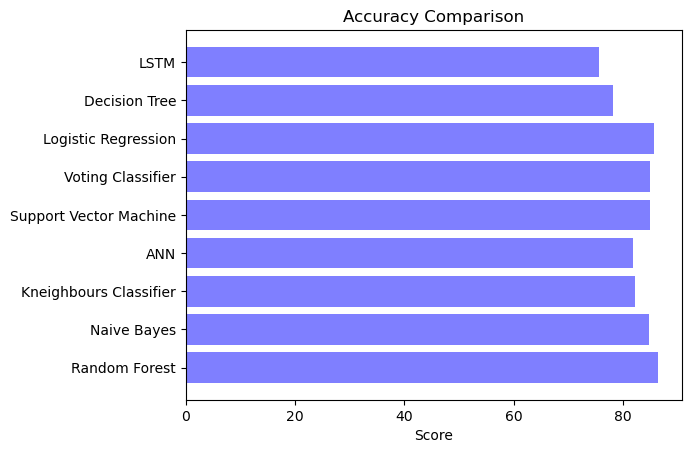

In [159]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [160]:
results ={'Accuracy': [rf_result*100,nb_result*100,knn_result*100,ann_result*100,svm_result*100,vc_result*100,lr_result*100,dt_result*100,lstm_result*100],
 'Recall':[recall_rf*100,recall_nb*100,knn_result*100,recall_ann*100,recall_svm*100,recall_vc*100,recall_lr*100,recall_dt*100,recall_lstm*100],
 'Precision': [precision_rf*100,precision_nb*100,knn_result*100,precision_ann*100,precision_svm*100,precision_vc*100,precision_lr*100,precision_dt*100,precision_lstm*100]}
index = ['Random Forest','Naive Bayes','Kneighbours Classifier','ANN','Support Vector Machine','Voting Classifier','Logistic Regression','Decision Tree','LSTM']

In [161]:
results =pd.DataFrame(results,index=index)

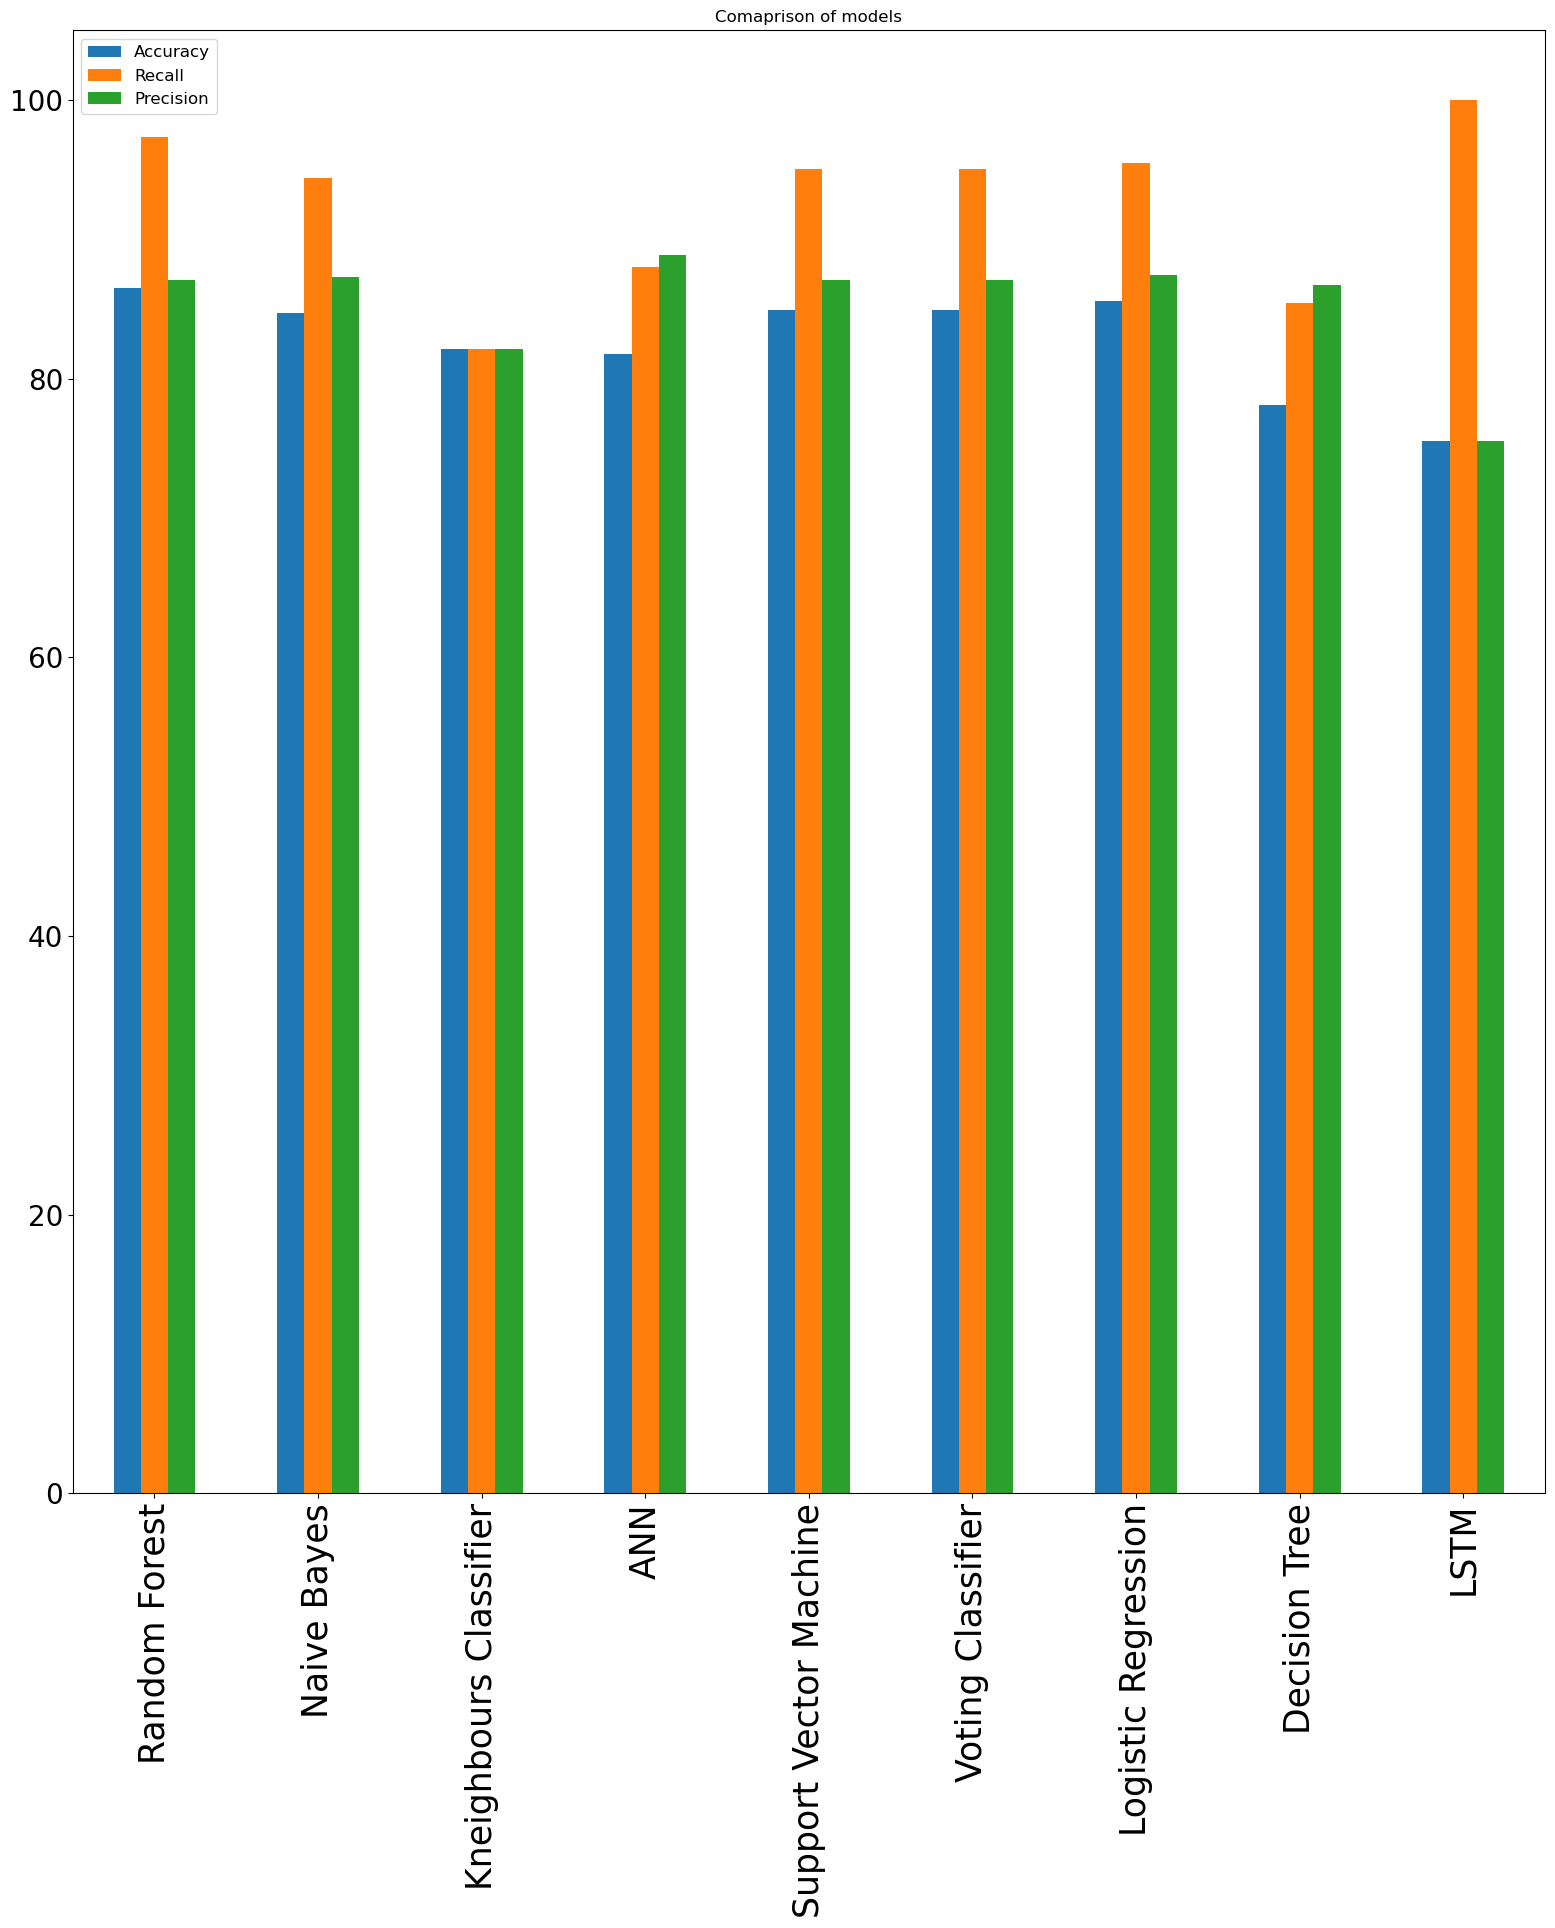

In [171]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.legend(fontsize=12)
fig.savefig('acc.png')

In [163]:
results

,Accuracy,Recall,Precision
Random Forest,86.468330,97.330097,87.079262
Naive Bayes,84.740883,94.417476,87.317621
Kneighbours Classifier,82.149712,82.149712,82.149712
ANN,81.765835,87.985437,88.848039
Support Vector Machine,84.932821,95.024272,87.096774
Voting Classifier,84.932821,95.024272,87.096774
Logistic Regression,85.604607,95.509709,87.444444
Decision Tree,78.119002,85.436893,86.699507
LSTM,75.539568,100.000000,75.539568
